#### 상수항 결합

In [1]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [2]:
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

#### Numpy를 이용한 선형 회귀분석

In [7]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [8]:
w

array(86.44794301)

In [9]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

In [10]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[99.79150869],
       [86.96171201]])

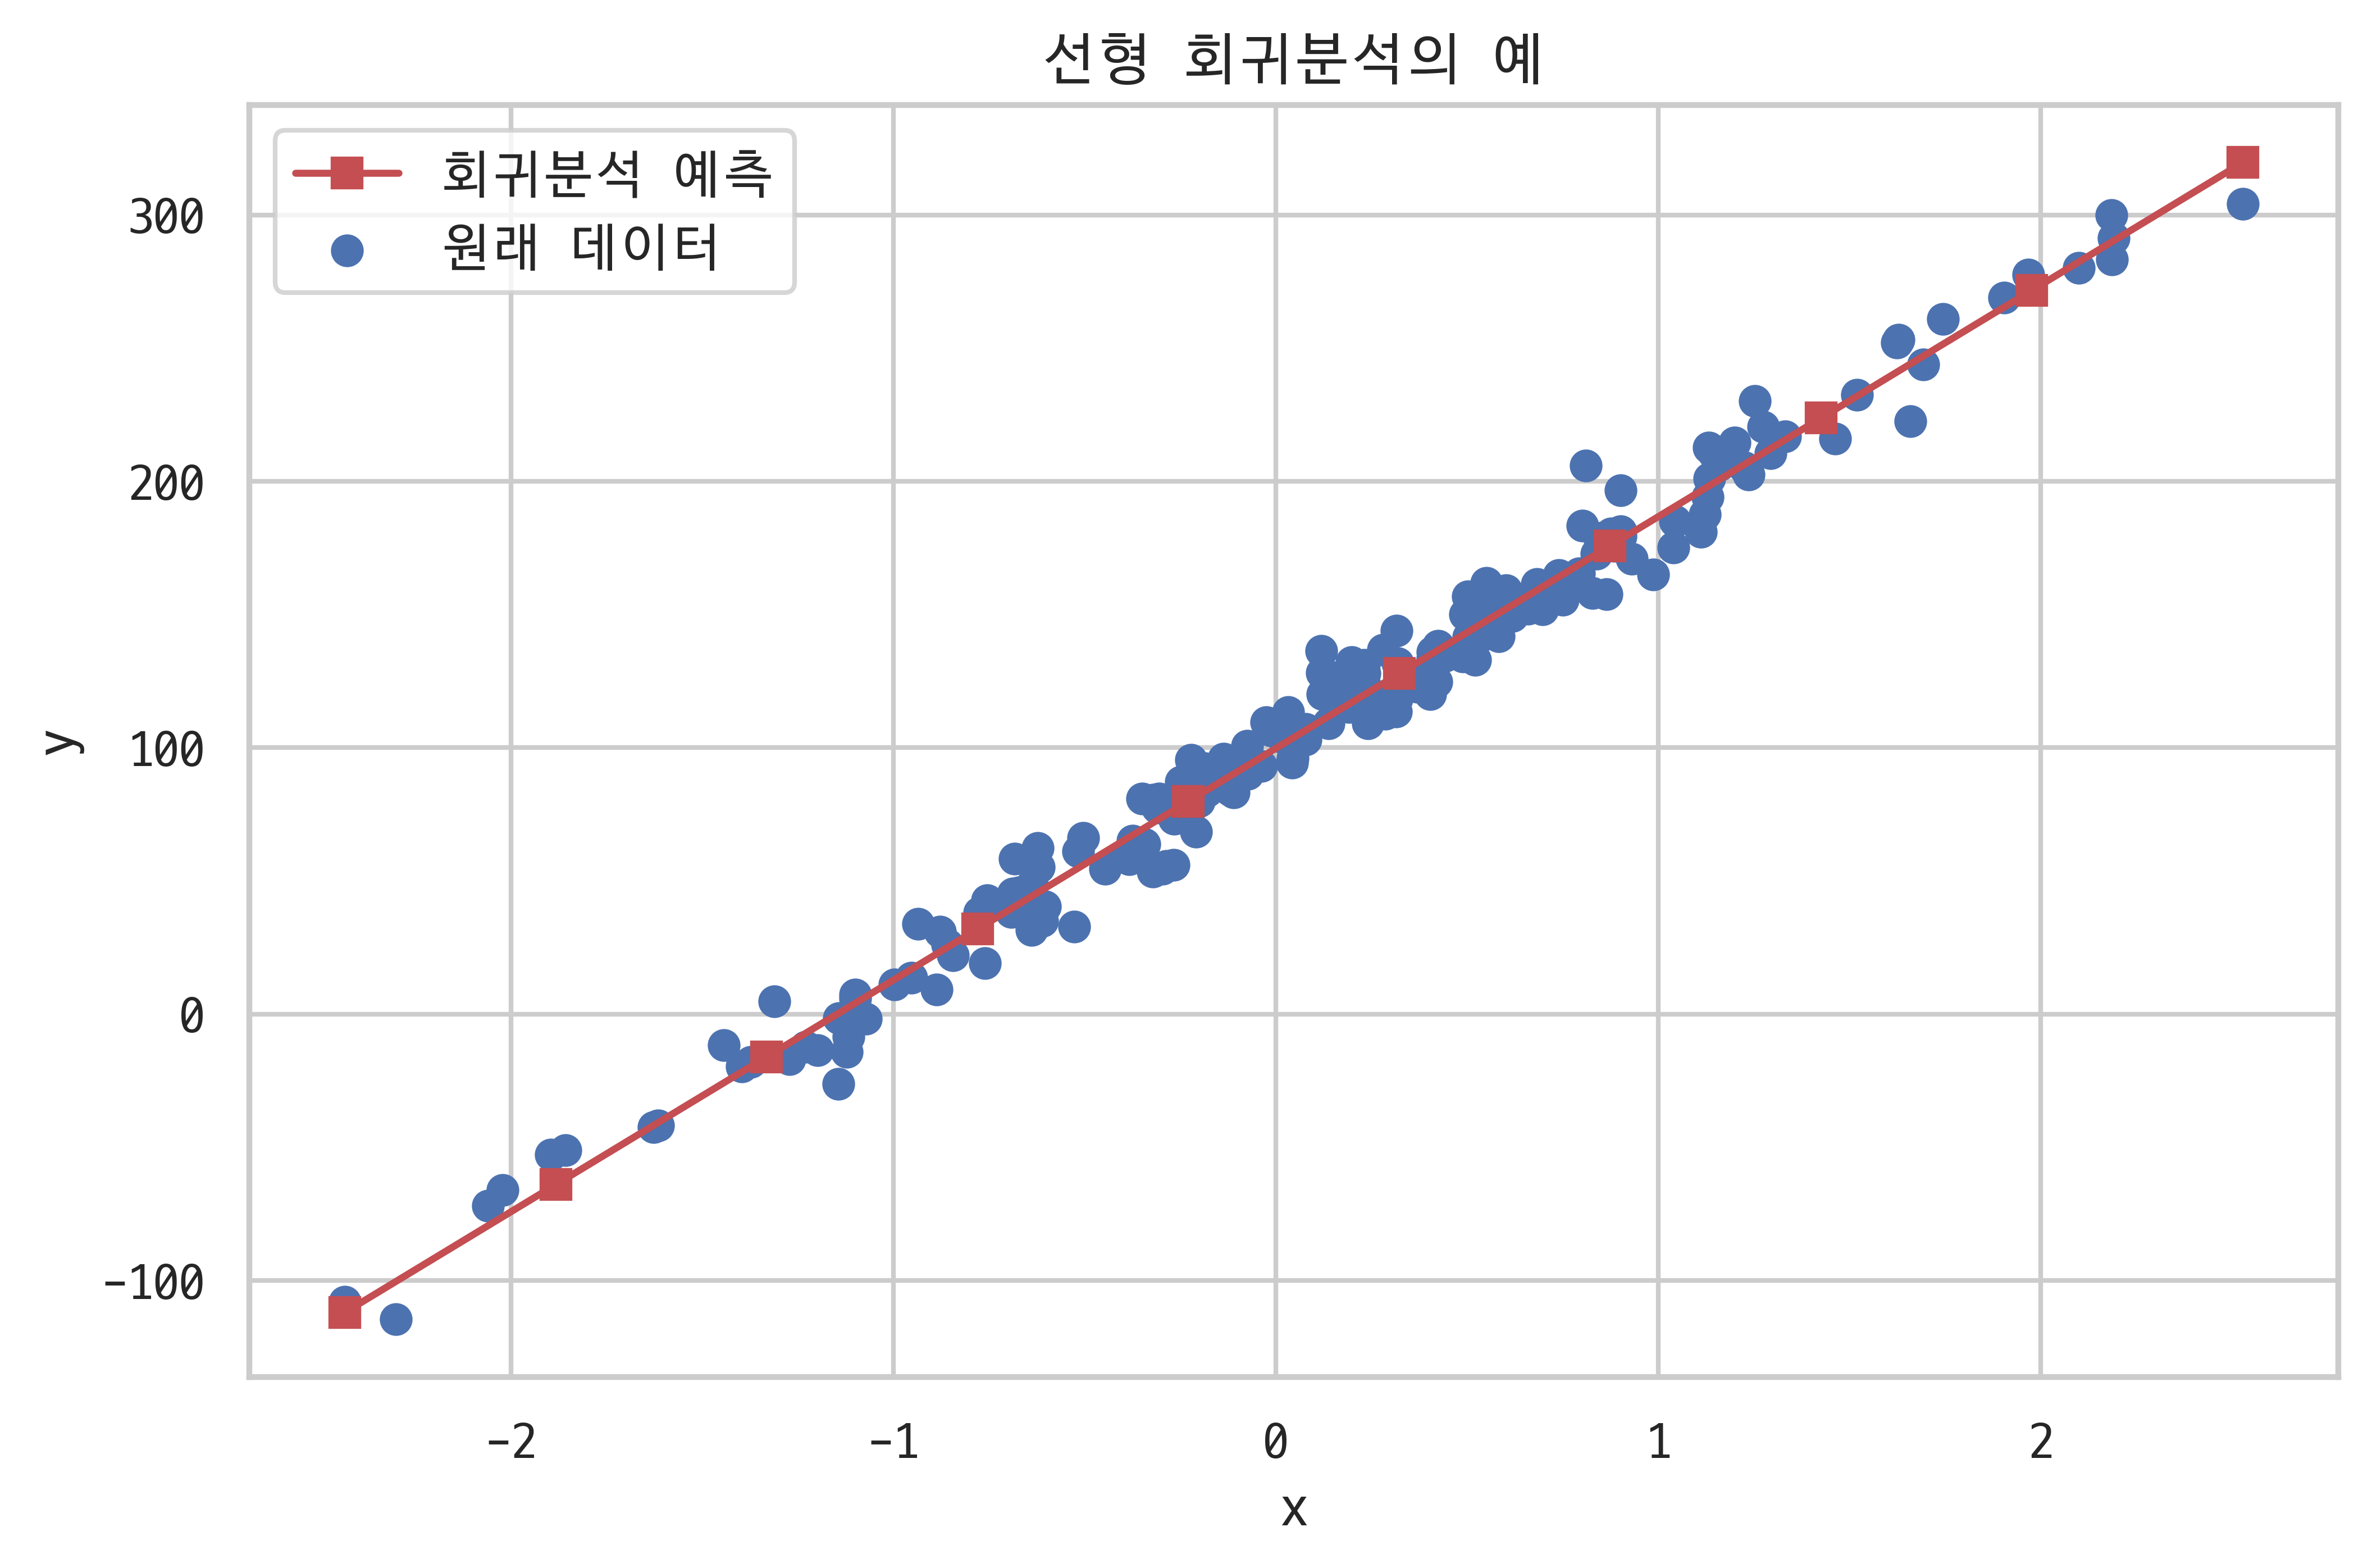

In [11]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)    # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label='원래 데이터')
plt.plot(x_new, y_new, 'rs-', label='회귀분석 예측')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

#### scikit-learn 패키지를 사용한 선형 회귀분석

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [13]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

#### statsmodels 패키지를 사용한 선형 회귀분석

In [19]:
df = pd.DataFrame({'x': X0[:, 0], 'y': y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [20]:
# method 1
dfy = df[['y']]
dfX = sm.add_constant(df[['x']])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [21]:
# method 2
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [22]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          8.17e-182
Time:                        22:45:59   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [23]:
result.predict({"x": [-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [24]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

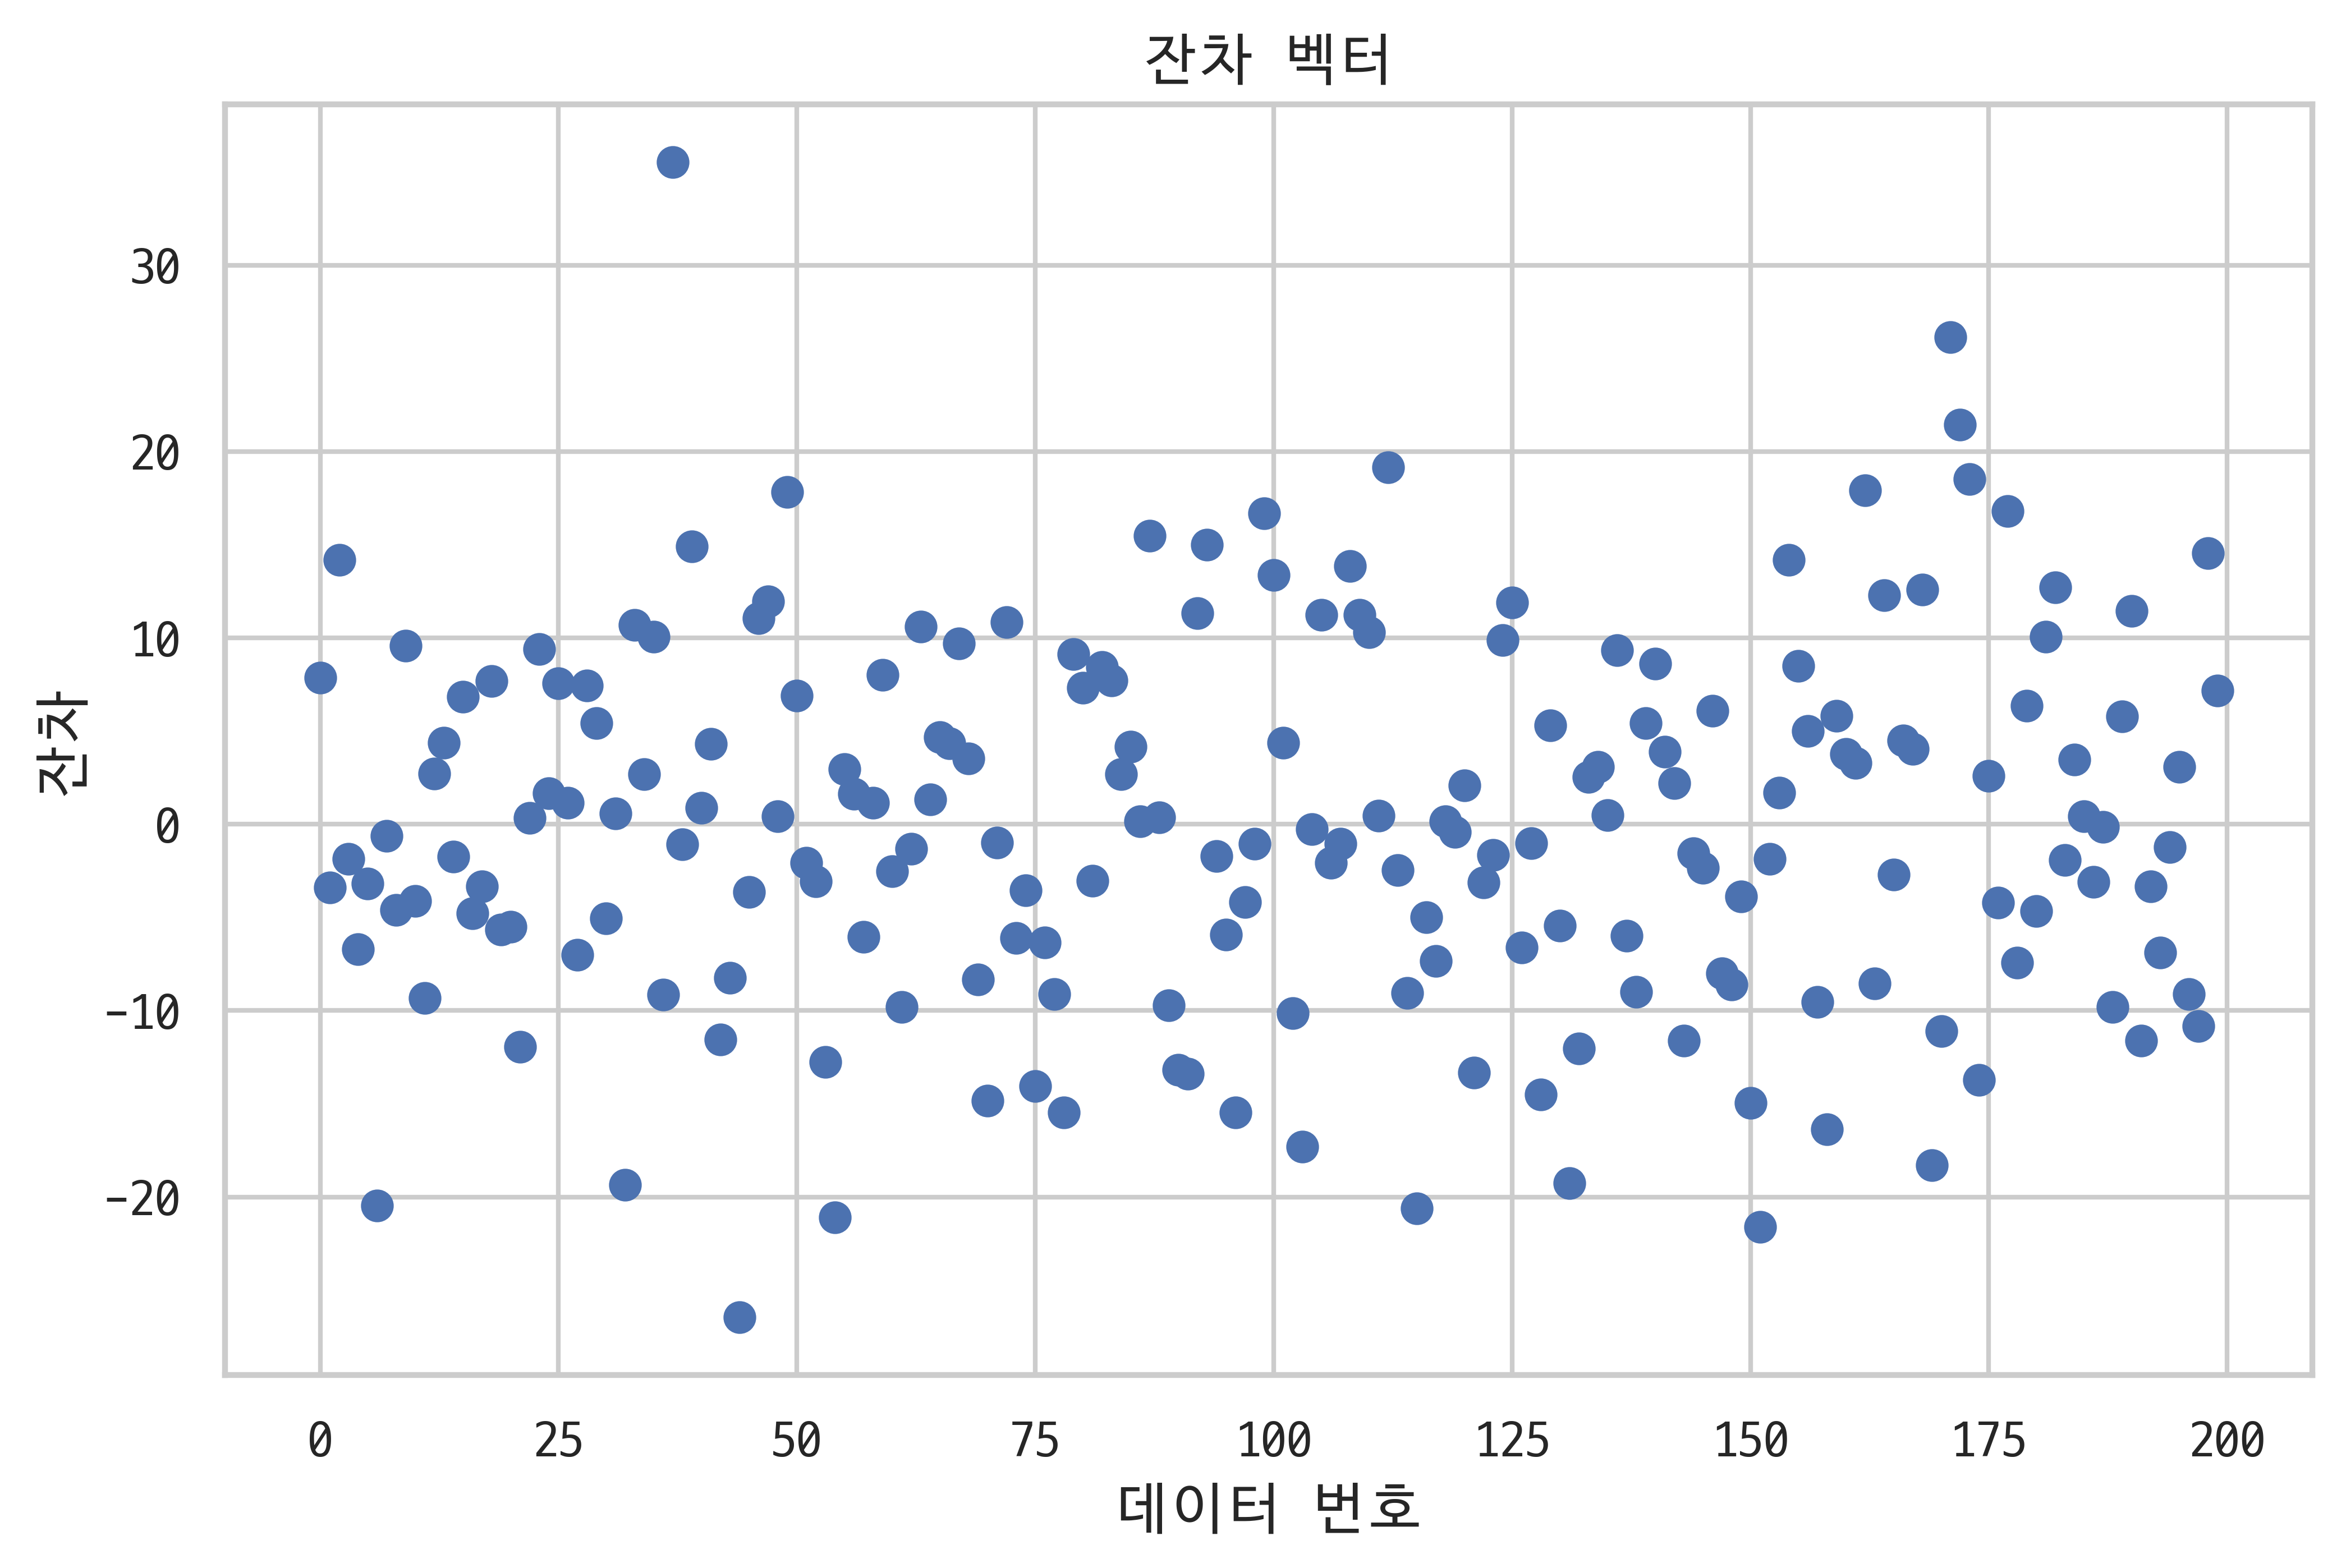

In [25]:
result.resid.plot(style='o')
plt.xlabel('데이터 번호')
plt.ylabel('잔차')
plt.title('잔차 벡터')
plt.show()

In [26]:
result.resid.sum()

6.572520305780927e-13

In [27]:
result.predict({'x': X0.mean()})

0    109.069351
dtype: float64

In [28]:
y.mean()

109.06935068170773

#### 보스턴 집값 예측

In [29]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        22:47:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

#### Ex. 4.2.1 (diabetes)

In [30]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=['target'])

model_diabetes = sm.OLS(dfy, dfX)
result_diabetes = model_diabetes.fit()
print(result_diabetes.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.83e-62
Time:                        22:48:46   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0